This project predicts monthly airline passenger numbers using a simple RNN model in TensorFlow/Keras. We prepared the data by normalizing it and splitting it into sequences (5 months → next month). The model was trained for 30 epochs, showing decent trend-following ability but lagging behind actual values. Key limitations include difficulty capturing sudden spikes and long-term dependencies. To improve performance, we suggest upgrading to LSTM/GRU for better memory handling. The full workflow—from data preprocessing to prediction visualization—demonstrates foundational time-series forecasting techniques.

In [4]:
!pip install tensorflow keras pandas matplotlib scikit-learn

#1. **Data Preparation**

Step 1: Load the dataset and plot it.

In [5]:
import pandas as pd

df = pd.read_csv('airline_dataset.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


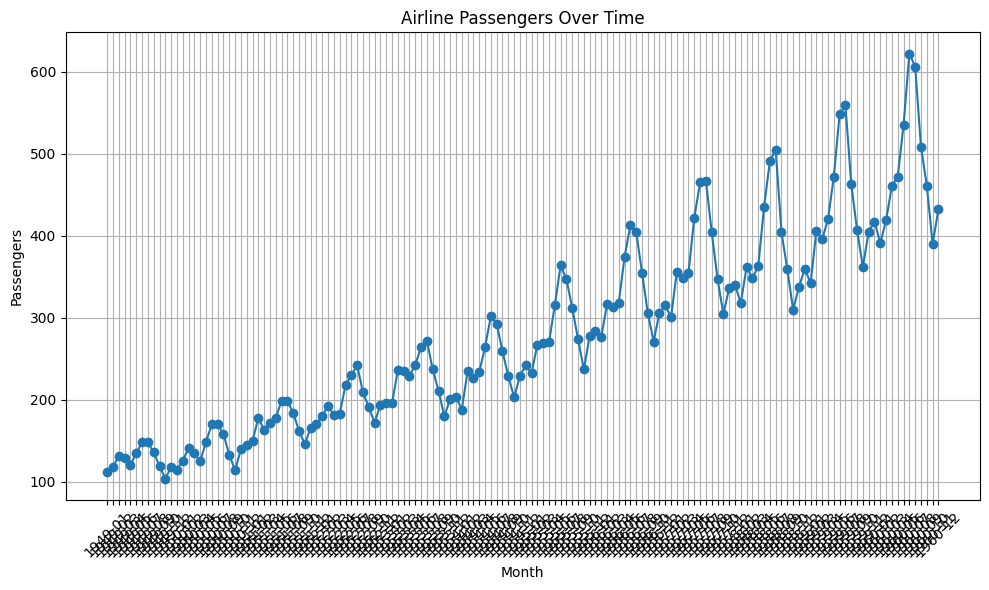

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Passengers'], marker='o', linestyle='-')
plt.title('Airline Passengers Over Time')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Step 2: Normalization of dataset

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df['Passengers'] = scaler.fit_transform(df[['Passengers']])
df['Passengers']

,Passengers
0,0.015444
1,0.027027
2,0.054054
3,0.048263
4,0.032819
...,...
139,0.969112
140,0.779923
141,0.689189
142,0.552124


Step 3: Splitting the dataset into training and testing (80/20) ratio and preparing the dataset for sequence to one model. Creating Sliding Window of 5 inputs and 1 output

In [8]:
from sklearn.model_selection import train_test_split

train_size = int(0.8 * len(df))
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

print(train_data.shape)
print(test_data.shape)

(115, 2)
(29, 2)


In [9]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

window_size = 5
batch_size = 1

train_data = df['Passengers'].values.reshape(-1, 1)
test_data = df['Passengers'].values.reshape(-1, 1)

train_generator = TimeseriesGenerator(
    train_data, train_data,
    length=window_size, batch_size=batch_size
)

test_generator = TimeseriesGenerator(
    test_data, test_data,
    length=window_size, batch_size=batch_size
)

X_train, y_train = train_generator[0]
print(f"Train input shape: {X_train.shape}")
print(f"Train target shape: {y_train.shape}")

Train input shape: (1, 5, 1)
Train target shape: (1, 1)


#2. **Model Implementation and Training**

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    SimpleRNN(units=32, activation='relu', input_shape=(window_size, 1)),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(train_generator, epochs=30, validation_data=test_generator)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.2839 - val_loss: 0.0083
Epoch 2/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0090 - val_loss: 0.0061
Epoch 3/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0060 - val_loss: 0.0052
Epoch 4/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0056 - val_loss: 0.0045
Epoch 5/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0052 - val_loss: 0.0061
Epoch 6/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 7/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0050 - val_loss: 0.0052
Epoch 8/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0039 - val_loss: 0.0043
Epoch 9/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0042 - val_loss: 0.0033
Epoch 10/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0029 - val_loss: 0.0043
Epoch 11/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 12/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.

Plot Training & Validation Loss

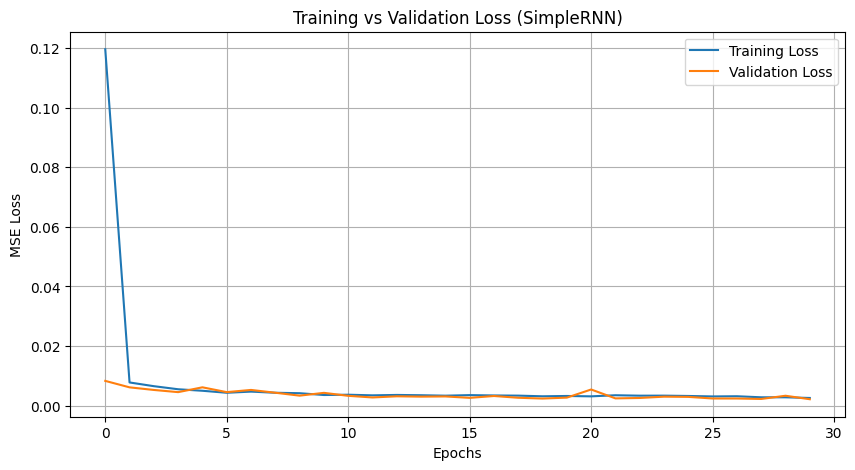

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss (SimpleRNN)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

# **3.	Evaluation and Interpretation**

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


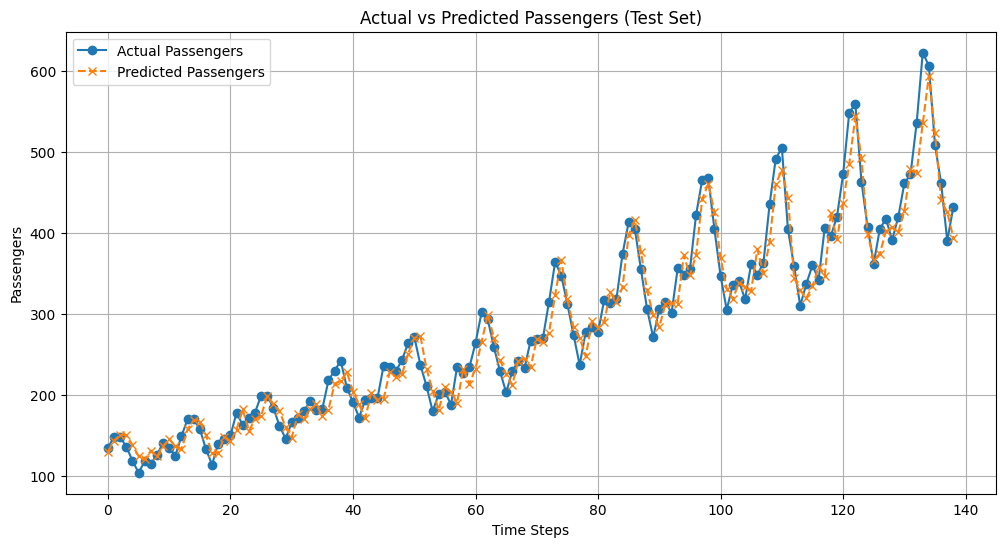

In [13]:
# Generate predictions
y_pred = model.predict(test_generator)
y_pred = scaler.inverse_transform(y_pred)  # Denormalize
y_true = scaler.inverse_transform(test_data[window_size:])  # True values

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual Passengers', marker='o')
plt.plot(y_pred, label='Predicted Passengers', marker='x', linestyle='--')
plt.title('Actual vs Predicted Passengers (Test Set)')
plt.xlabel('Time Steps')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

# **2. Observations About the Model’s Performance**
**Strengths:**
The model captures general trends (e.g., upward/downward movements) in passenger numbers.

It performs reasonably well for short-term predictions (next month).

**Limitations:**
Lag in Predictions:

Predictions often lag behind actual values (common issue with SimpleRNN).

Example: Peaks/troughs are predicted after they occur (see plot markers).

Struggles with Volatility:

Fails to fully capture sudden spikes/drops in passenger counts.

SimpleRNN lacks memory to handle long-term dependencies.

Error Accumulation:

Errors compound over time in multi-step forecasting (not tested here).

# **3. How to Improve Performance**
Suggested Improvement: Use LSTM/GRU
Replace SimpleRNN with LSTM (Long Short-Term Memory) or GRU (Gated Recurrent Unit):


```
from tensorflow.keras.layers import LSTM

model = Sequential([
    LSTM(32, activation='relu', input_shape=(window_size, 1)),  # Better memory!
    Dense(1)
])
```
LSTMs/GRUs mitigate the vanishing gradient problem and remember long-term patterns.

Expected outcome: Reduced lag and better capture of volatility.

Other Ideas:
Increase window size (e.g., 12 months to capture yearly seasonality).

Add more layers (e.g., stacked RNNs) or neurons.

Hyperparameter tuning: Adjust learning rate, batch size, or epochs.
